# Queensland Government research and development 
# expenditure report 2012-13

### This document analyses the Queensland Government research and development expenditure provided in the
### following dataset https://data.qld.gov.au/dataset/queensland-government-research-and-development-expenditure-data-for-2012-13/resource/c939ae49-0ad3-4f43-baf0-4d956c5a0c72

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 8)
import heapq

matplotlib.style.use('ggplot')
df = pd.read_excel('research-development-expenditure-2012-13.xlsx')

In [12]:
df.head(3)

,Agency_name,Project_title,Description,FOR,SEO,Start_date,End_date,Research_and_development_location,Funding_source,Expenditure_type,Budget,Research_and_development_expenditure_2012-13
0,Cairns and Hinterland Hospital and Health Service,Various,NaN,16.0,97,NaN,NaN,Various,Various,Current,NaN,697949
1,Children's Health Queensland Hospital and Heal...,Various,NaN,11.0,92,NaN,NaN,Various,Various,Current,0,8223044
2,Darling Downs Hospital and Health Service,Various,NaN,11.0,92,NaN,NaN,Various,Various,Current,NaN,175943


### The dataset contains the following information: Agency name, Project Title, Description, Field of Research, Socio-Economic Opportunity, Start date, End date, Location, Funding Source, Expenditure Type, Budget and Expenditure in 2012-2013

In [96]:
df.columns = [c.replace(' ', '_') for c in df.columns]
list(df.columns.values)

[u'Agency_name',
 u'Project_title',
 u'Description',
 u'FOR',
 u'SEO',
 u'Start_date',
 u'End_date',
 u'Research_and_development_location',
 u'Funding_source',
 u'Expenditure_type',
 u'Budget',
 u'Research_and_development_expenditure_2012-13']

### The agencies receiving government funding are:

In [5]:
df.Agency_name.unique()

array([u'Cairns and Hinterland Hospital and Health Service',
       u"Children's Health Queensland Hospital and Health Service",
       u'Darling Downs Hospital and Health Service',
       u'Department of Aboriginal and Torres Strait Islander and Multicultural Affairs',
       u'Department of Communities, Child Safety and Disability Services',
       u'Department of Community Safety',
       u'Department of Education, Training and Employment',
       u'Department of Energy and Water Supply', u'Department of Health',
       u'Department of Housing and Public Works',
       u'Department of Justice and Attorney General',
       u'Department of National Parks, Recreation, Sport and Racing',
       u'Department of Natural Resources and Mines',
       u'Department of Science, Information Technology, Innovation and the Arts - Science and Innovation',
       u'Department of Science, Information Technology, Innovation and the Arts - Science Delivery',
       u'Department of the Premier & Cabine

### The locations of the research are:

In [9]:
df.Research_and_development_location.unique()

array([u'Various', u'In-house', u'Australian Government', u'Universities',
       u'Other Qld Government Dept', u'Joint business/government',
       u'Statutory body', u'Other Australian locations',
       u'Overseas locations', u'Business', u'various',
       u'Private non-profit', u'Private Non-Profit', u'in-house',
       u'Other state/local government'], dtype=object)

### The sources of funding are:

In [11]:
df.Funding_source.unique()

array([u'Various', u'Private non-profit', u'Department',
       u'Other State/Local Government', u'Universities',
       u'Australian Government', u'Private Non-Profit',
       u'Joint Business/Government Organisations', u'Overseas Sources',
       u'Other Australian locations', u'Business', u'various',
       u'Statutory body', u'Aust Government'], dtype=object)

## The two agencies having the most projects funded are the Department of Agriculture, Fisheries and Forestry (>800) and the Department of Science, IT, Innovation and the Arts (430). All other agencies have fewer than 100 projects. 

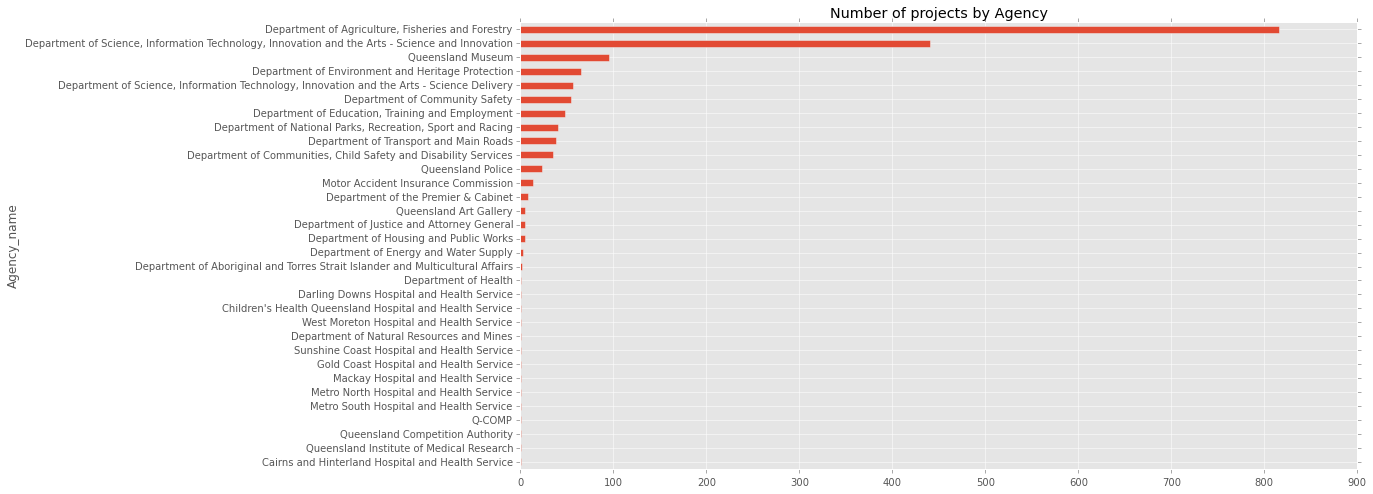

In [310]:
df_byAgency=df.groupby(['Agency_name']).size().sort_values()
p=df_byAgency.plot.barh()
patches, labels = p.get_legend_handles_labels()
plt.title('Number of projects by Agency')
plt.show() 

### The three departments receiving the most funding in 2012-2013 are the Department of Science, IT, Innovation and the Arts (250 million), the Queensland Institute of Medical Research (100 million) and the Department of Agriculture, Fisheries and Forestry (85 million). 

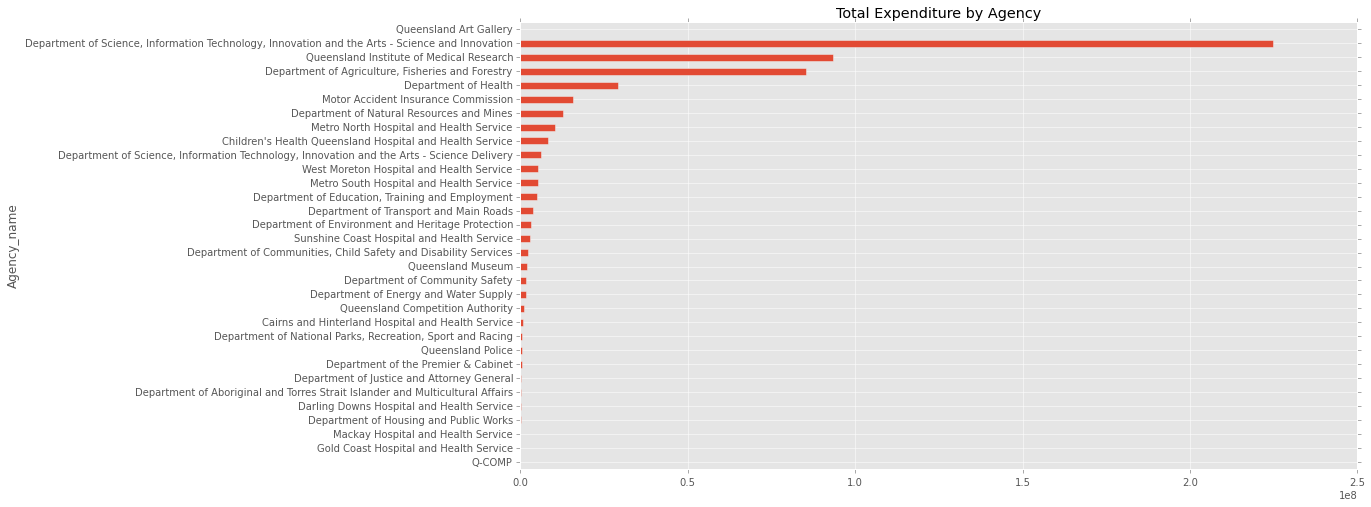

In [314]:
df_expbyAgency=df.groupby('Agency_name')['Research_and_development_expenditure_2012-13'].sum().sort_values()
p=df_expbyAgency.plot.barh()
patches, labels = p.get_legend_handles_labels()
plt.title('Total Expenditure by Agency')
plt.show() 

### Most of the projects are carried out In-house and at Universities

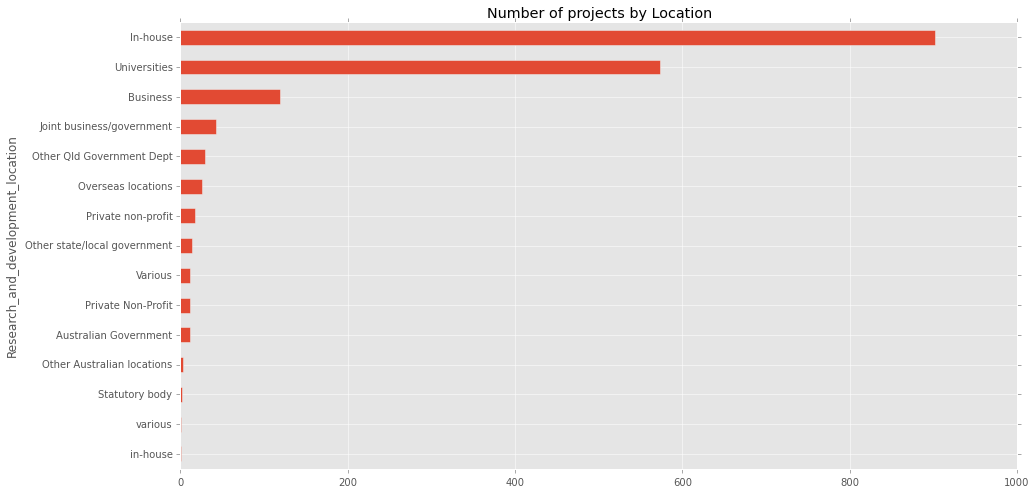

In [30]:
df_byLocation=df.groupby(['Research_and_development_location']).size().sort_values()
p=df_byLocation.plot.barh()
patches, labels = p.get_legend_handles_labels()
plt.title('Number of projects by Location')
plt.show() 

### Universities receive the most funding. 

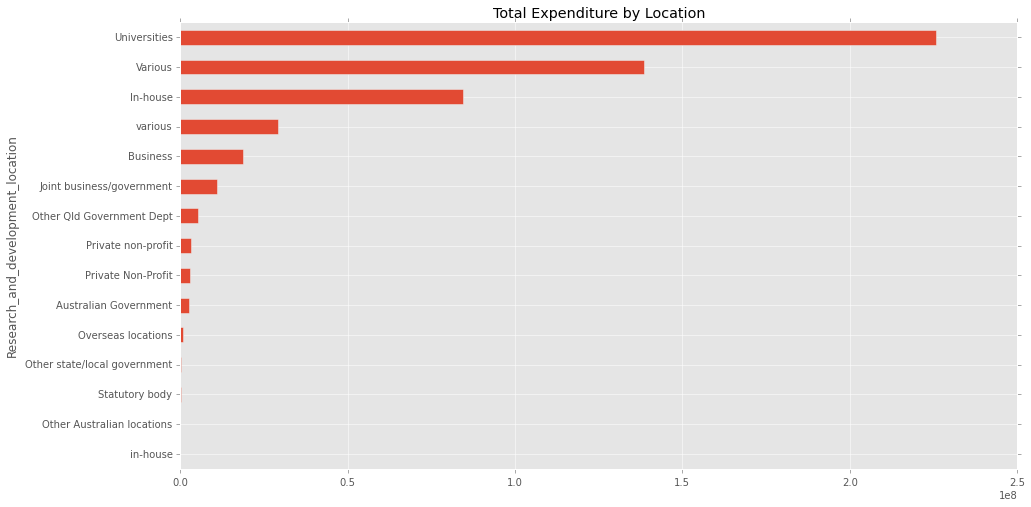

In [313]:
df_expbyLocation=df.groupby('Research_and_development_location')['Research_and_development_expenditure_2012-13'].sum().sort_values()
p=df_expbyLocation.plot.barh()
plt.title('Total Expenditure by Location')
plt.show() 

### Most of the projects are funded by Department, Joint Business/Govt Orgs, the Aus Govt and Universities

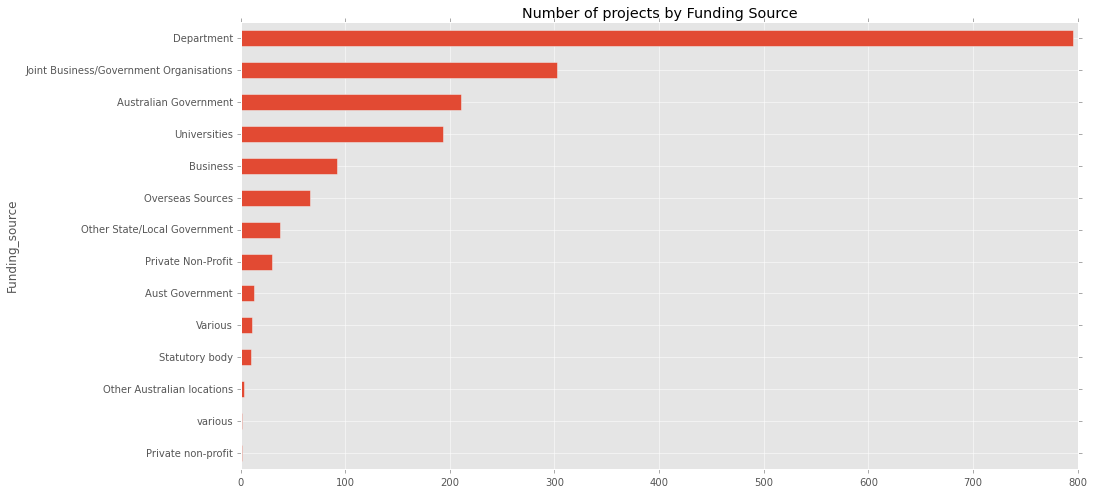

In [32]:
df_byFunding=df.groupby(['Funding_source']).size().sort_values()
p=df_byFunding.plot.barh()
patches, labels = p.get_legend_handles_labels()
plt.title('Number of projects by Funding Source')
plt.show() 

### Most of the funding comes from Department, Various, Universities and the Aus Govt. 

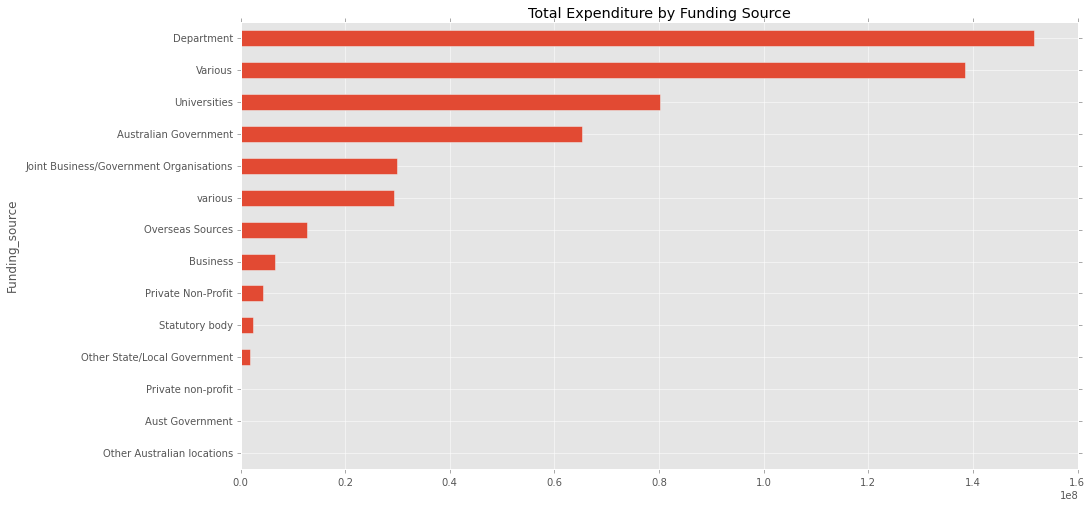

In [315]:
df_expbyFunding=df.groupby('Funding_source')['Research_and_development_expenditure_2012-13'].sum().sort_values()
p=df_expbyFunding.plot.barh()
plt.title('Total Expenditure by Funding Source')
plt.show()

### Projects vary widely in Budget size. 

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


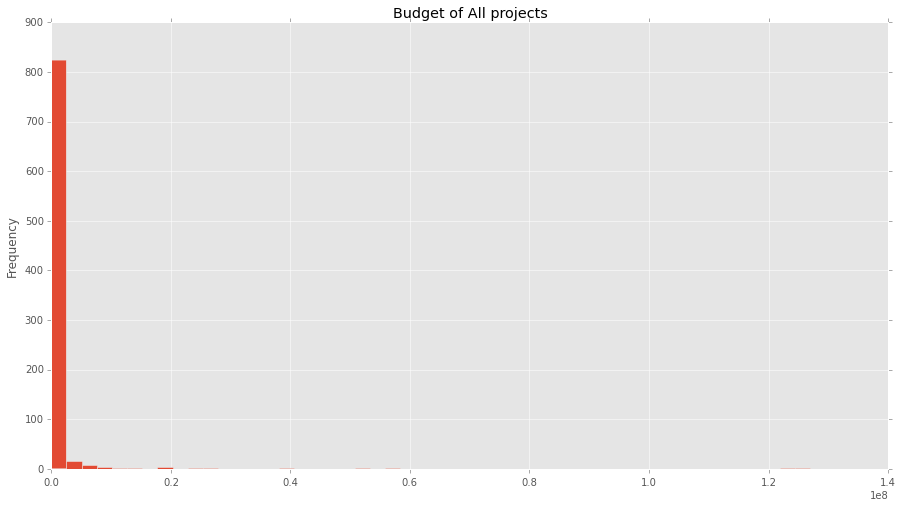

In [104]:
df['Budget']=df['Budget'].convert_objects(convert_numeric=True)
projects=df[df['Budget']>0]
projects['Budget'].plot.hist(bins=50)
plt.title('Budget of All projects')

### The following large projects have budget of over ten million dollars. 

In [81]:
df[df['Budget']>1e7]

,Agency name,Project title,Description,FOR,SEO,Start date,End date,Research and development location,Funding source,Expenditure type,Budget,Research and development expenditure 2012-13
144,Department of Energy and Water Supply,University of Queensland Geothermal Centre of ...,To establish an identifiable integrated resear...,9.0,85,1/07/2009,30/06/2015,Universities,Department,Current,15000000.0,1500000
197,"Department of Science, Information Technology,...",The Centre for Advanced Imaging,The project aims to expand athe capabilities o...,11.0,92,19/12/2011,31/01/2014,Universities,Australian Government,Current,40231000.0,19310880
198,"Department of Science, Information Technology,...",Institute for Molecular Bioscience,. The IMB's mission is to decipher the informa...,11.0,92,2007-11-19 00:00:00,2004-06-30 00:00:00,Universities,Department,Current,127000000.0,15000000
203,"Department of Science, Information Technology,...",Australian Pancreatic and Ovarian Cancer Genom...,The International Cancer Genome Consortium (IC...,11.0,92,3/07/2009,30/03/2015,Universities,Australian Government,Current,27499330.0,4.78249e+06
205,"Department of Science, Information Technology,...",Queensland Tropical Health Alliance,The QTHA will bring together under the umbrell...,11.0,92,2009-07-20 00:00:00,1939-07-20 00:00:00,Universities,Department,Capital,52700000.0,2902000
280,"Department of Science, Information Technology,...",Health and Medical Research Centre,The HMRC provides clinical researchers with th...,11.0,92,2007-09-14 00:00:00,2037-09-14 00:00:00,Private Non-Profit,Department,Capital,19600000.0,153054
516,"Department of Science, Information Technology,...",National RDSI and NeCTAR Infrastructure.,To establish a Queensland node of the Commonwe...,8.0,89,20/01/2012,30/06/2015,Business,Australian Government,Current,10800000.0,3.16098e+06
621,"Department of Science, Information Technology,...",The NCRIS capability area 5.11 Terrestrial Eco...,"To establish, operate and provide the necessar...",5.0,96,17/05/2010,30/04/2014,Universities,Australian Government,Current,20000000.0,5000000
626,"Department of Science, Information Technology,...",The Sir Samuel Griffith Centre,The aim of the project is for Griffith Univers...,10.0,85,4/11/2011,31/03/2015,Universities,Australian Government,Current,23155000.0,6.77707e+06
634,"Department of Science, Information Technology,...",Institute for Future Environments,The IFE will focus on research themes that wil...,9.0,86,2010-11-09 00:00:00,2040-11-09 00:00:00,Universities,Department,Capital,122798000.0,5000000


### Most projects have budget under half a million dollars. 

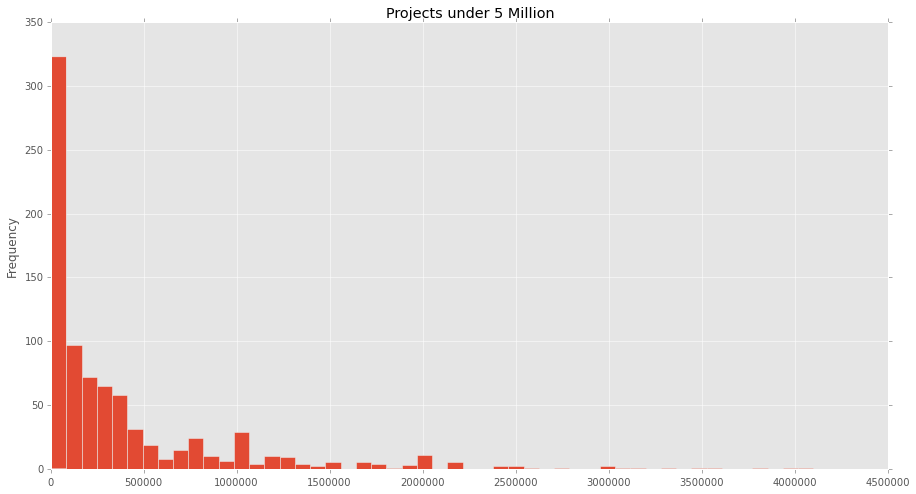

In [105]:
small_projects=projects[projects['Budget']<0.5*1e7]
small_projects['Budget'].plot.hist(bins=50)
plt.title('Projects under 5 Million')

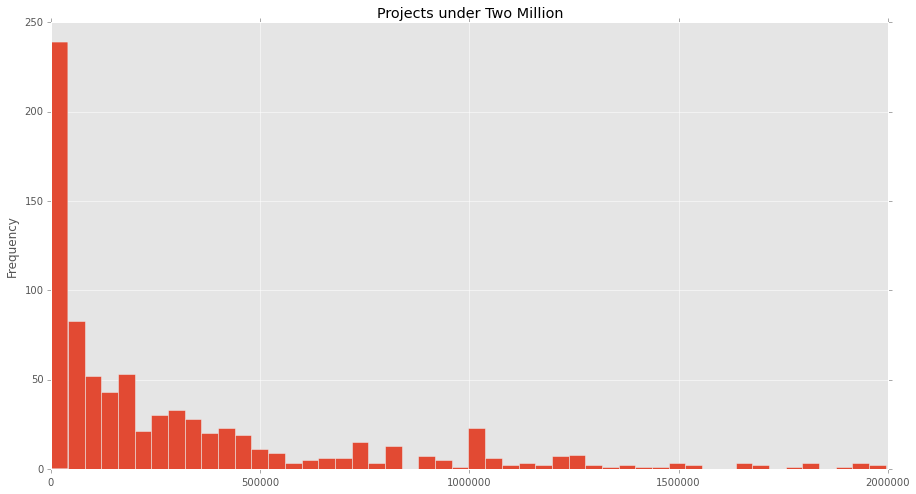

In [106]:
very_small_projects=projects[projects['Budget']<0.2*1e7]
very_small_projects['Budget'].plot.hist(bins=50)
plt.title('Projects under Two Million')

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


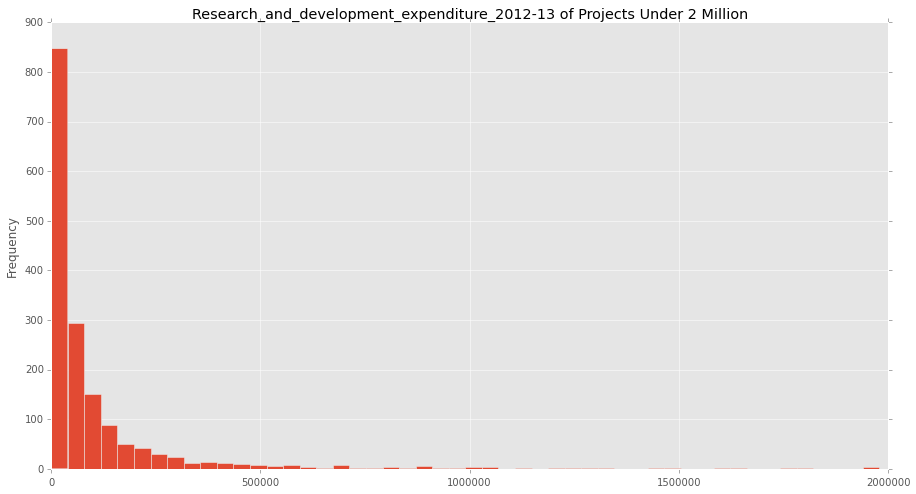

In [107]:
df['Research_and_development_expenditure_2012-13']=df['Research_and_development_expenditure_2012-13'].convert_objects(convert_numeric=True)
e=df[(df['Research_and_development_expenditure_2012-13']>0) & (df['Research_and_development_expenditure_2012-13']<2*1e6)]
e['Research_and_development_expenditure_2012-13'].plot.hist(bins=50)
plt.title('Research_and_development_expenditure_2012-13 of Projects Under 2 Million')

### Fields of Research (FOR) classification

### The 2008 ANZSRC FOR classification allows R&D activity to be categorised according to the field of research. In this respect, it is the methodology used in the R&D that is being considered.

### The categories in the classification include major fields and related sub-fields of research and emerging areas of study investigated by businesses, universities, tertiary institutions, national research institutions and other organisations.
### http://www.arc.gov.au/rfcd-seo-and-anzsic-codes


### The Field of Research (FOR) code is as follows: 

In [180]:
import re
for_code = open('for.txt')
for_dict=dict()
for line in for_code:
    x=re.findall('[a-zA-Z0-9]\S*',line);
    x[1]=int(x[1])
    for_dict[x[1]]=' '.join(x[2:])
for_dict
    

{1: 'MATHEMATICAL SCIENCES',
 2: 'PHYSICAL SCIENCES',
 3: 'CHEMICAL SCIENCES',
 4: 'EARTH SCIENCES',
 5: 'ENVIRONMENTAL SCIENCES',
 6: 'BIOLOGICAL SCIENCES',
 7: 'AGRICULTURAL AND VETERINARY SCIENCES',
 8: 'INFORMATION AND COMPUTING SCIENCES',
 9: 'ENGINEERING',
 10: 'TECHNOLOGY',
 11: 'MEDICAL AND HEALTH SCIENCES',
 12: 'BUILT ENVIRONMENT AND DESIGN',
 13: 'EDUCATION',
 14: 'ECONOMICS',
 15: 'COMMERCE, MANAGEMENT, TOURISM AND SERVICES',
 16: 'STUDIES IN HUMAN SOCIETY',
 17: 'PSYCHOLOGY AND COGNITIVE SCIENCES',
 18: 'LAW AND LEGAL STUDIES',
 19: 'STUDIES IN CREATIVE ARTS AND WRITING',
 20: 'LANGUAGE, COMMUNICATION AND CULTURE',
 21: 'HISTORY AND ARCHAEOLOGY',
 22: 'PHILOSOPHY AND RELIGIOUS STUDIES'}

### Most projects are in Agricultural and Veterinary, Medical and Health, and Environmental Sciences. 

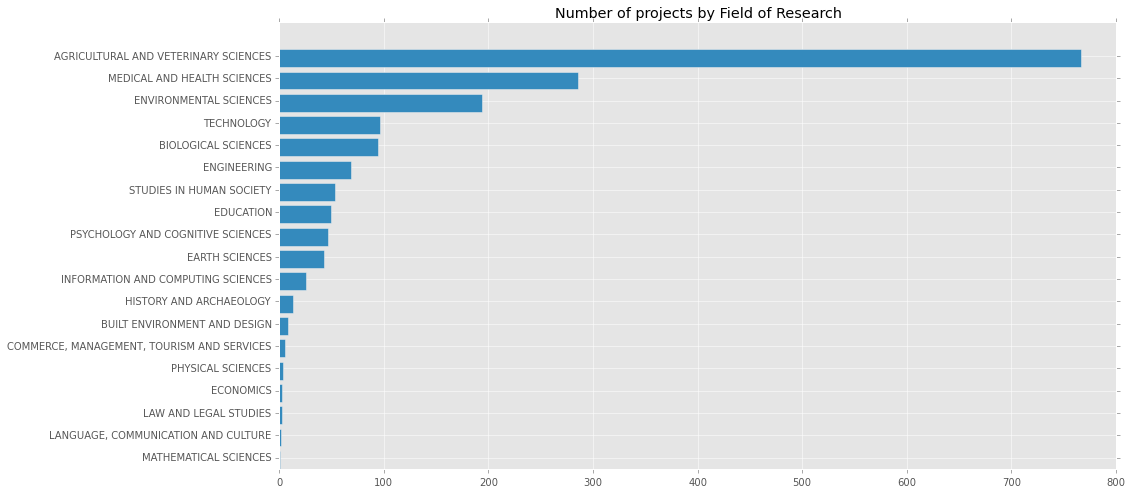

In [361]:
df_byFOR=df.groupby(['FOR']).size().sort_values()
nfor= len(df_byFOR.index) 
plt.barh(np.arange(nfor), df_byFOR.values)
plt.title('Number of projects by Field of Research')
plt.yticks( np.arange(nfor)+0.5, [for_dict[df_byFOR.index[i]] for i in np.arange(nfor)]  )
plt.show() 

### Projects in Medical and Health Sciences, Engineering, and Agricultural and Vet Sciences receive most of the funding. 

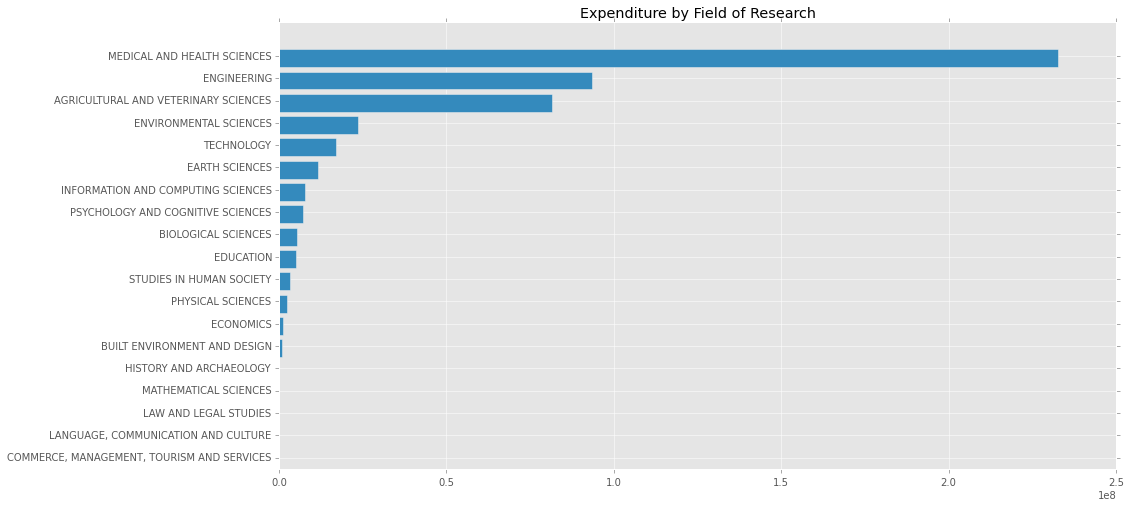

In [360]:
df_expbyFOR=df.groupby(['FOR'])['Research_and_development_expenditure_2012-13'].sum().sort_values()
plt.barh(np.arange(nfor), df_expbyFOR.values)
plt.yticks( np.arange(nfor)+0.5, [for_dict[df_expbyFOR.index[i]] for i in np.arange(nfor)]  )
plt.title('Expenditure by Field of Research')
plt.show() 

### Per projects, Engineering, Medical and Chemical Sciences are the most costly. 

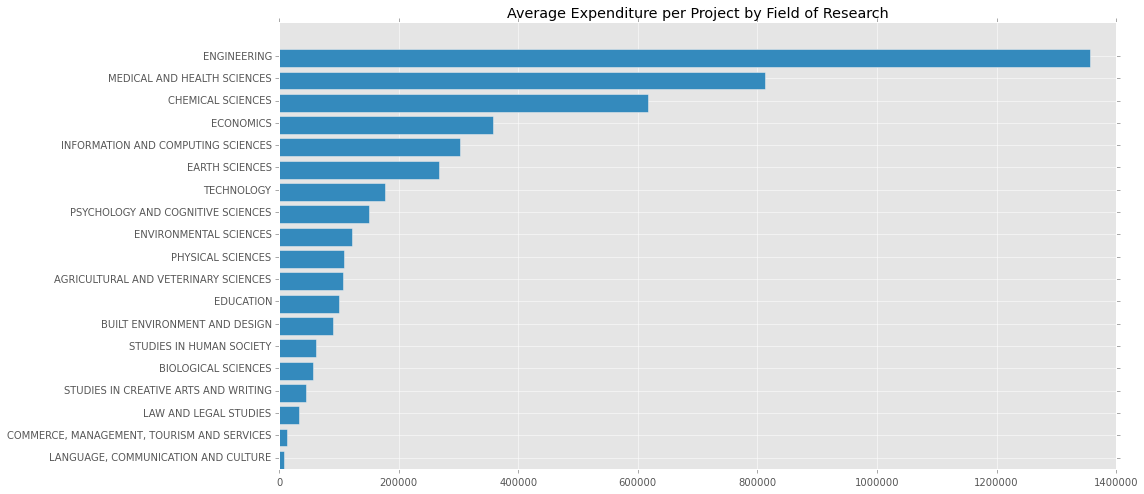

In [395]:
from operator import truediv
df_expbyFOR_unsorted=df.groupby(['FOR'])['Research_and_development_expenditure_2012-13'].sum()
df_byFOR_unsorted=df.groupby(['FOR']).size()
avg_for = map(truediv, df_expbyFOR_unsorted , df_byFOR_unsorted)
ind= sorted(range(len(avg_for)), key=lambda k: avg_for[k])
plt.barh(np.arange(nfor), [avg_for[i] for i in ind])
plt.yticks( np.arange(nfor)+0.5, [for_dict.values()[i+1] for i in ind] )
plt.title('Average Expenditure per Project by Field of Research')
plt.show() 

### Socio-Economic Objective (SEO) classification

### The ANZSRC SEO classification allows R&D activity in Australia and New Zealand to be categorised according to the intended purpose or outcome of the research rather than the processes or techniques used in order to achieve this objective. The purpose categories include processes, products, health, education and other social and environmental aspects in Australia and New Zealand that R&D activity aims to improve.

### The 2008 ANZSRC SEO classification updates the 1998 ASRC SEO classification.

### A purpose classification such as the SEO provides a set of categories which collectively exhaust all the objectives of research. In this respect, the scope of the SEO is more extensive than a classification of economic activities such as the Australian and New Zealand Standard Industrial Classification (ANZSIC), because not all R&D has an economic motive or context.



### Socio-Economic Objective classification is as follows: 

In [428]:
seo_code = open('seo.txt')
seo_dict=dict()
for line in seo_code:
    x=line.split()
    if x[1].isdigit():
        x[1]=int(x[1])
        seo_dict[x[1]]=' '.join(x[2:])
lst = seo_dict.keys()
lst.sort()
SEO_dict=[0]*len(lst)
for i in np.arange(len(lst)):
    SEO_dict[i]= seo_dict[lst[i]]
seo_dict

{81: 'DEFENCE',
 82: 'PLANT PRODUCTION AND PLANT PRIMARY PRODUCTS',
 83: 'ANIMAL PRODUCTION AND ANIMAL PRIMARY PRODUCTS',
 84: 'MINERAL RESOURCES (EXCL. ENERGY RESOURCES)',
 85: 'ENERGY',
 86: 'MANUFACTURING',
 87: 'CONSTRUCTION',
 88: 'TRANSPORT',
 89: 'INFORMATION AND COMMUNICATION SERVICES',
 90: 'COMMERCIAL SERVICES AND TOURISM',
 91: 'ECONOMIC FRAMEWORK',
 92: 'HEALTH',
 93: 'EDUCATION AND TRAINING',
 94: 'LAW, POLITICS AND COMMUNITY SERVICES',
 95: 'CULTURAL UNDERSTANDING',
 96: 'ENVIRONMENT',
 97: 'EXPANDING KNOWLEDGE'}

### Most projects are in Plant Production, Envirnonment, Health and Animal Production.

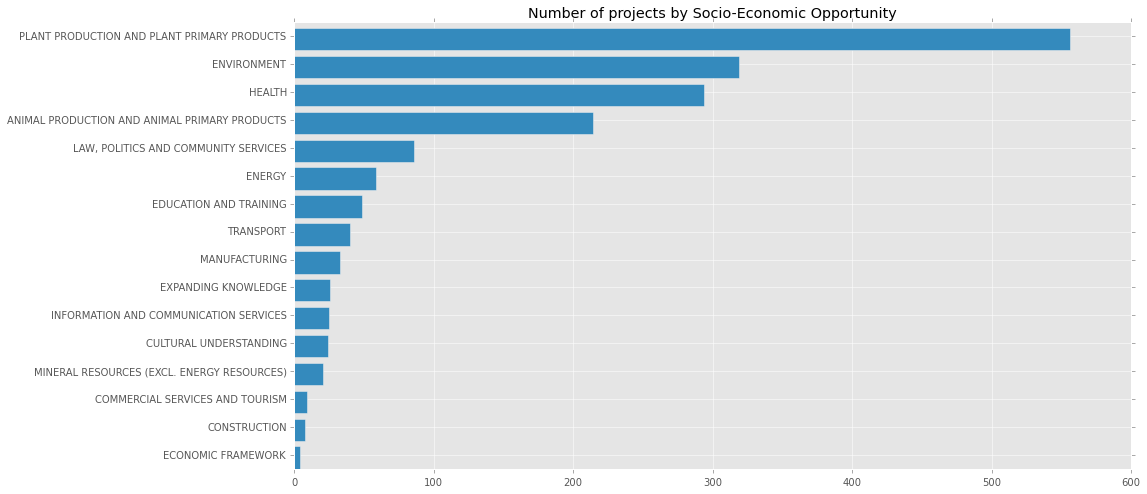

In [397]:
df['SEO'] = df['SEO'].astype(float)
df_bySEO=df.groupby(['SEO']).size().sort_values()
nseo= len(df_bySEO.index) 
plt.barh(np.arange(nseo), df_bySEO.values)
plt.title('Number of projects by Socio-Economic Objective')
plt.yticks( np.arange(nseo)+0.5,  [seo_dict[df_bySEO.index[i]] for i in np.arange(nseo)]  )
plt.show() 


### Projects with objectives in Health, Manufacturing, Plan production receive the most funding. 

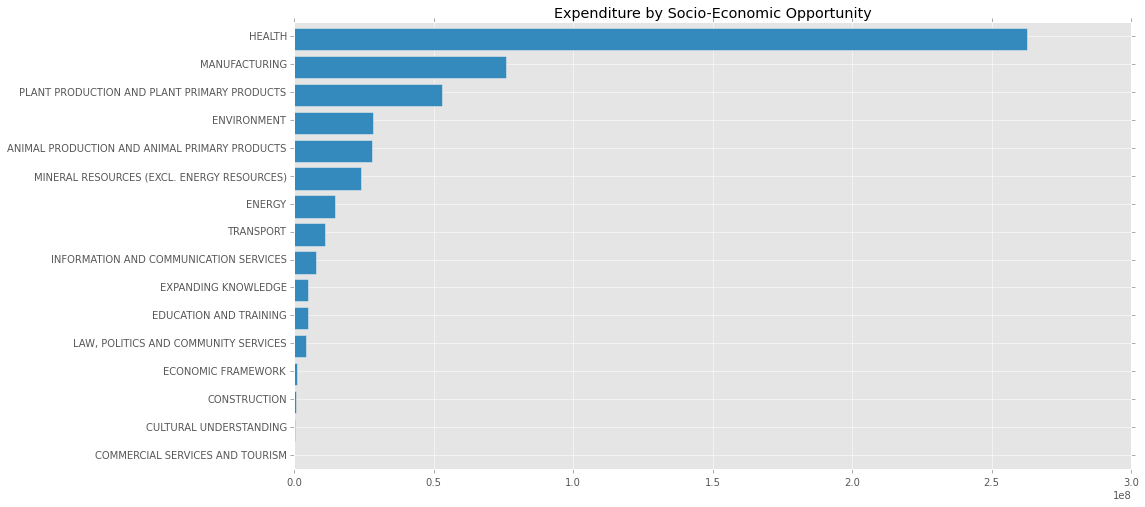

In [399]:
df_expbySEO=df.groupby(['SEO'])['Research_and_development_expenditure_2012-13'].sum().sort_values()
plt.barh(np.arange(nseo), df_expbySEO.values)
plt.title('Expenditure by Socio-Economic Opportunity')
plt.yticks( np.arange(nseo)+0.5, [seo_dict[df_expbySEO.index[i]] for i in np.arange(nseo)] )
plt.show() 

### Projects related to Mineral resources, Plan Production and Commerical Services are the most expensive. 

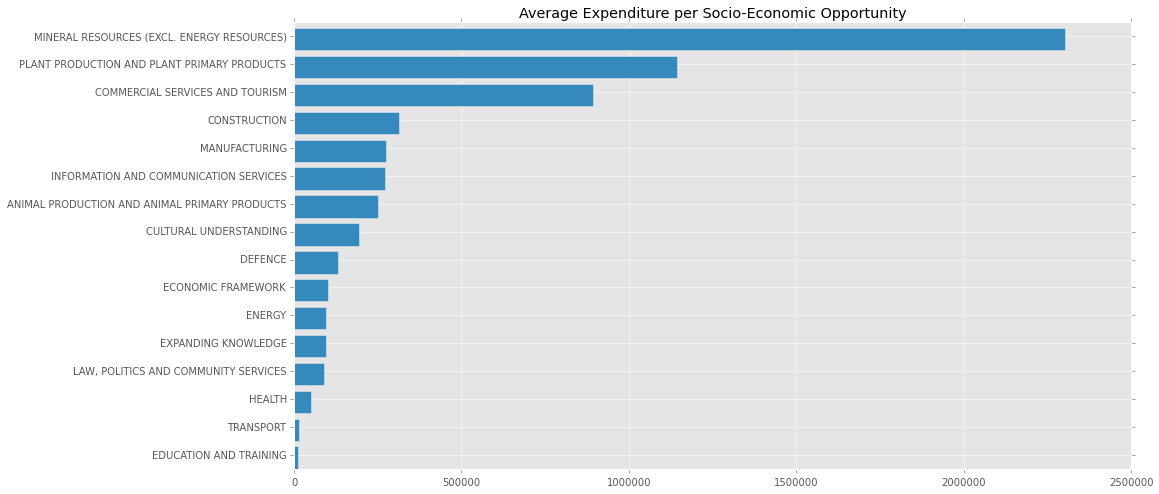

In [400]:
df_expbySEO_unsorted=df.groupby(['SEO'])['Research_and_development_expenditure_2012-13'].sum()
df_bySEO_unsorted=df.groupby(['SEO']).size()
avg_seo = map(truediv, df_expbySEO_unsorted , df_bySEO_unsorted)
ind= sorted(range(len(avg_seo)), key=lambda k: avg_seo[k])
plt.barh(np.arange(nseo), [avg_seo[i] for i in ind])
plt.yticks( np.arange(nseo)+0.5, [seo_dict.values()[i+1] for i in ind] )
plt.title('Average Expenditure per Socio-Economic Opportunity')
plt.show() 

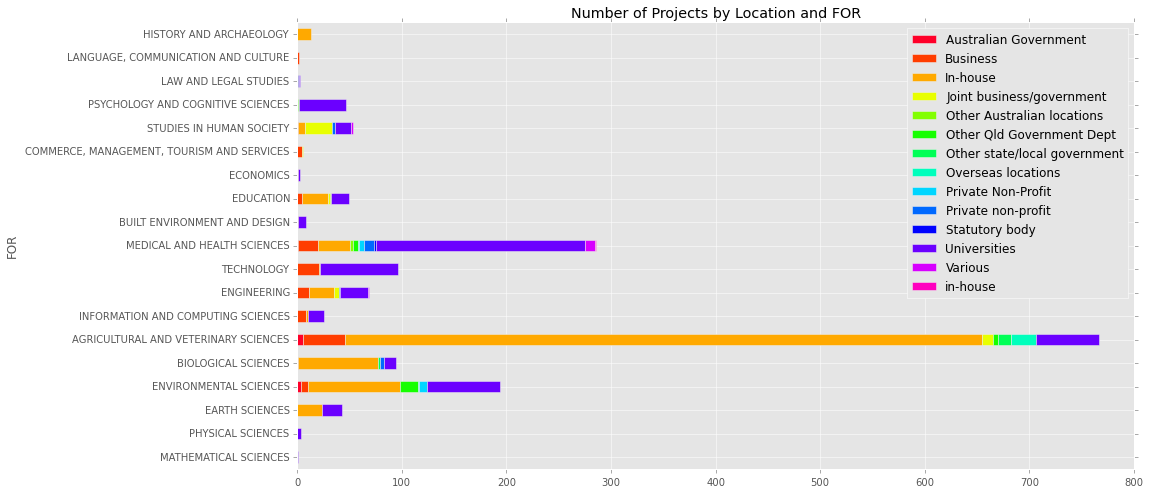

In [435]:
a=df.groupby(['FOR','Research_and_development_location']).size().unstack()
p=a.plot(kind='barh', stacked=True, colormap='gist_rainbow')
plt.yticks(np.arange(len(a.index)), [for_dict[i] for i in a.index])
plt.title('Number of Projects by Location and FOR')
patches, labels = p.get_legend_handles_labels()
p.legend(patches, list(a.columns.values), loc='best')
plt.show()


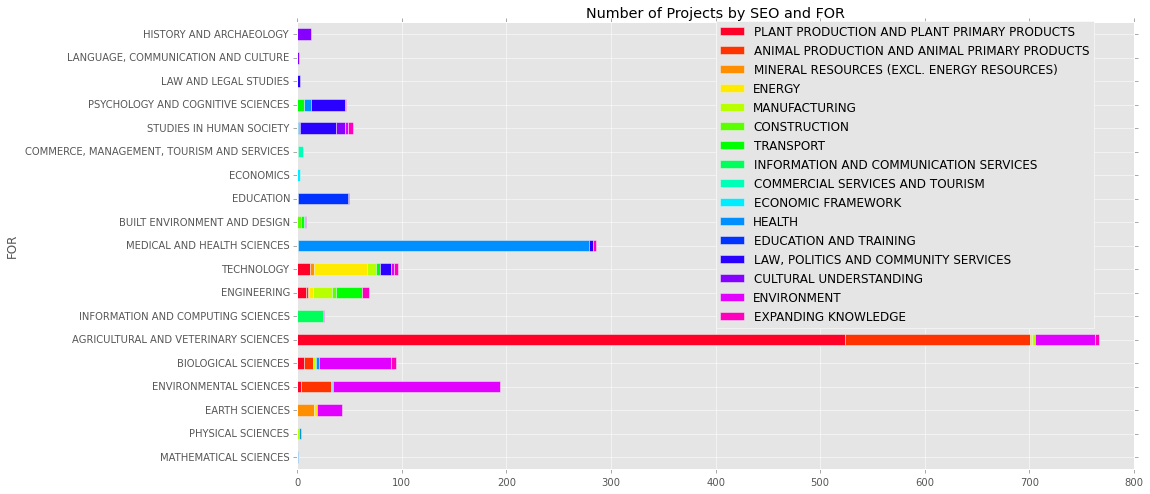

In [430]:
a=df.groupby(['FOR','SEO']).size().unstack()
p=a.plot(kind='barh', stacked=True, colormap='gist_rainbow')
plt.yticks(np.arange(len(a.index)), [for_dict[i] for i in a.index])
plt.title('Number of Projects by SEO and FOR')
patches, labels = p.get_legend_handles_labels()
p.legend(patches, [seo_dict[i] for i in list(a.columns.values)], loc=(0.5,0.315))
plt.show()

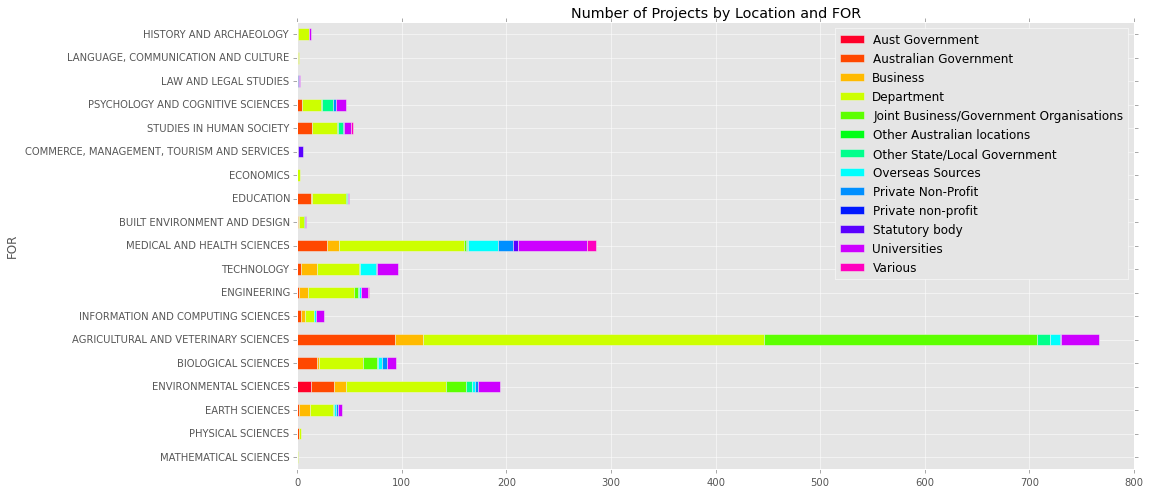

In [436]:
a=df.groupby(['FOR','Funding_source']).size().unstack()
p=a.plot(kind='barh', stacked=True, colormap='gist_rainbow')
plt.yticks(np.arange(len(a.index)), [for_dict[i] for i in a.index])
plt.title('Number of Projects by Funding source and FOR')
patches, labels = p.get_legend_handles_labels()
p.legend(patches, list(a.columns.values), loc='best')
plt.show()

### Durations of Projects vary greatly. Most are under 5 years, a few are over 30 to 95 years. 

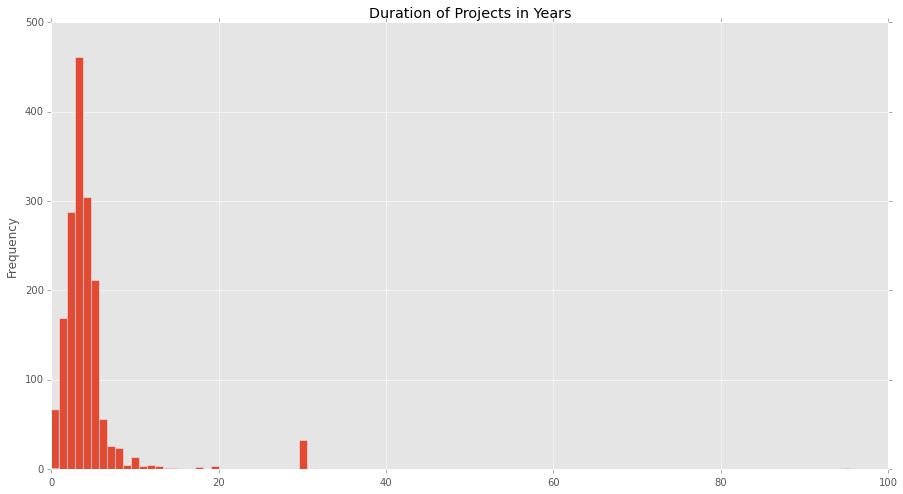

In [459]:
df['Start']=pd.to_datetime(df['Start_date'],errors='coerce')
df['End']=pd.to_datetime(df['End_date'],errors='coerce')
df['duration']=(df['End']-df['Start']).dt.days/365
df.loc[df['duration']<-70,'duration'] = 30
df.loc[df['duration']<0,'duration'] = 0
df['duration'].plot.hist(bins=100)
plt.title('Duration of Projects in Years')


([<matplotlib.axis.YTick at 0x114e22c90>,
 <a list of 22 Text yticklabel objects>)

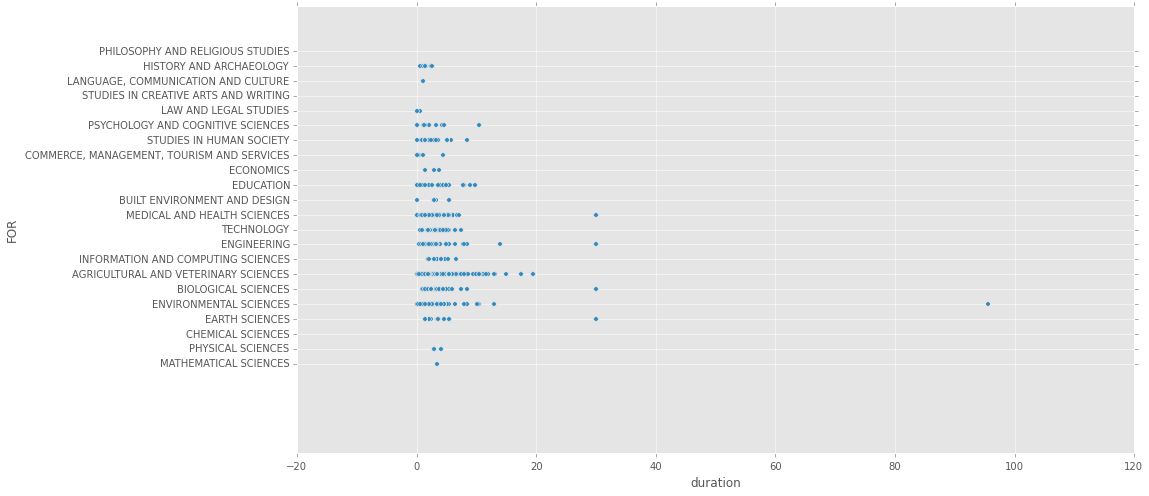

In [483]:
df.plot.scatter(y='FOR', x='duration')
plt.yticks(for_dict.keys(), for_dict.values())